### Importación de datos



In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Añadimos una columna para identificar cada tienda
tienda['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [11]:
todas_tiendas=pd.concat([tienda,tienda2,tienda3,tienda4],ignore_index=True)
todas_tiendas

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,Tienda 4
9431,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980,Tienda 4
9432,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 4
9433,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,Tienda 4


In [14]:
# Calculamos la facturación total por tienda (precio + costo de envío)
tienda['facturacion'] = tienda['Precio'] + tienda['Costo de envío']
tienda2['facturacion'] = tienda2['Precio'] + tienda2['Costo de envío']
tienda3['facturacion'] = tienda3['Precio'] + tienda3['Costo de envío']
tienda4['facturacion'] = tienda4['Precio'] + tienda4['Costo de envío']

In [15]:
# Sumamos la facturación de cada tienda
facturacion_tienda = tienda['facturacion'].sum()
facturacion_tienda2 = tienda2['facturacion'].sum()
facturacion_tienda3 = tienda3['facturacion'].sum()
facturacion_tienda4 = tienda4['facturacion'].sum()

In [17]:
# Mostramos la facturación total por tienda
facturacion_total = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Facturación Total': [facturacion_tienda, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]
})
print(facturacion_total)

     Tienda  Facturación Total
0  Tienda 1       1.212258e+09
1  Tienda 2       1.175829e+09
2  Tienda 3       1.156536e+09
3  Tienda 4       1.093693e+09


In [18]:
import matplotlib.pyplot as plt

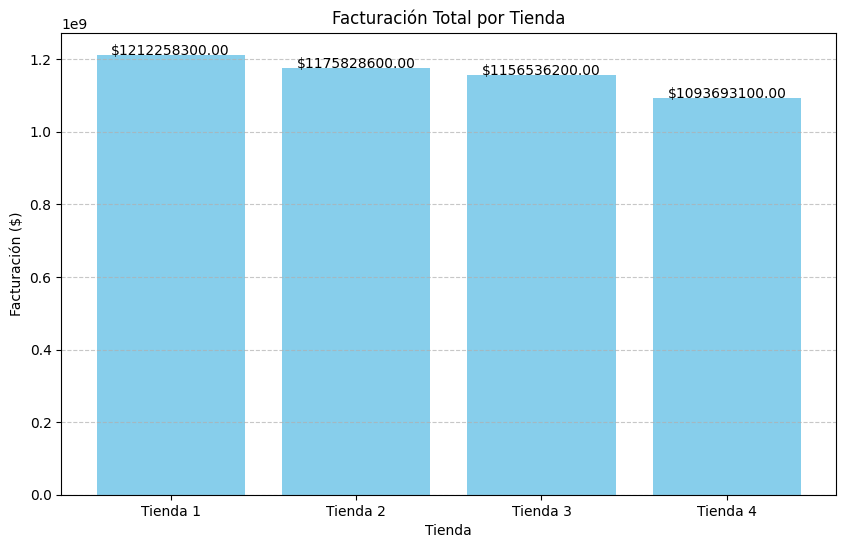

In [19]:
# Graficamos la facturación total
plt.figure(figsize=(10, 6))
plt.bar(facturacion_total['Tienda'], facturacion_total['Facturación Total'], color='skyblue')
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadimos los valores encima de cada barra
for i, v in enumerate(facturacion_total['Facturación Total']):
    plt.text(i, v + 0.5, f'${v:.2f}', ha='center')

plt.show()

# 2. Ventas por categoría


Categorías más populares en Tienda 1:
    Categoría del Producto  Cantidad
0                  Muebles       465
1             Electrónicos       448
2                 Juguetes       324
3        Electrodomésticos       312
4     Deportes y diversión       284
5   Instrumentos musicales       182
6                   Libros       173
7  Artículos para el hogar       171


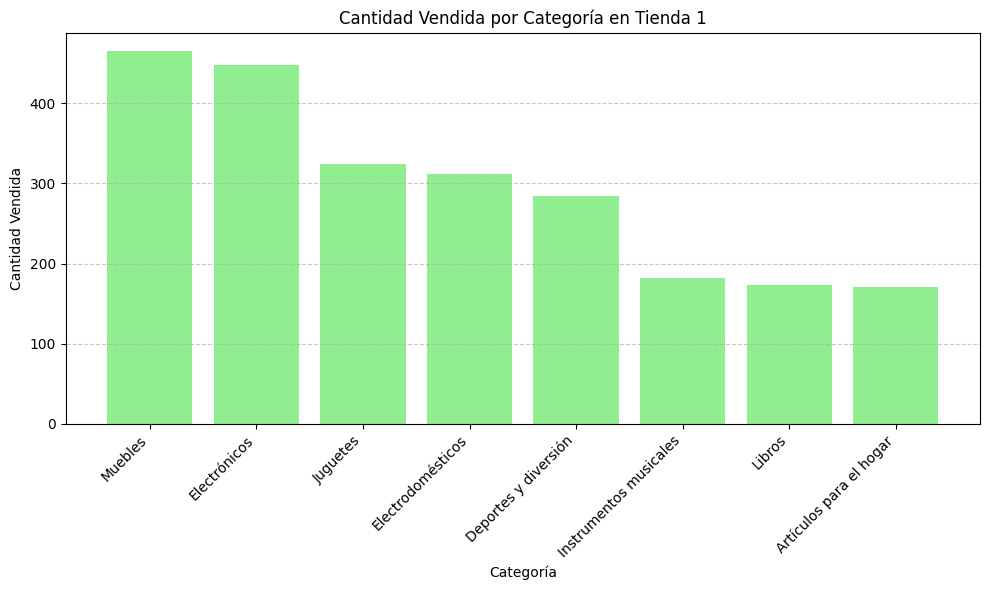


Categorías más populares en Tienda 2:
    Categoría del Producto  Cantidad
0                  Muebles       442
1             Electrónicos       422
2                 Juguetes       313
3        Electrodomésticos       305
4     Deportes y diversión       275
5   Instrumentos musicales       224
6                   Libros       197
7  Artículos para el hogar       181


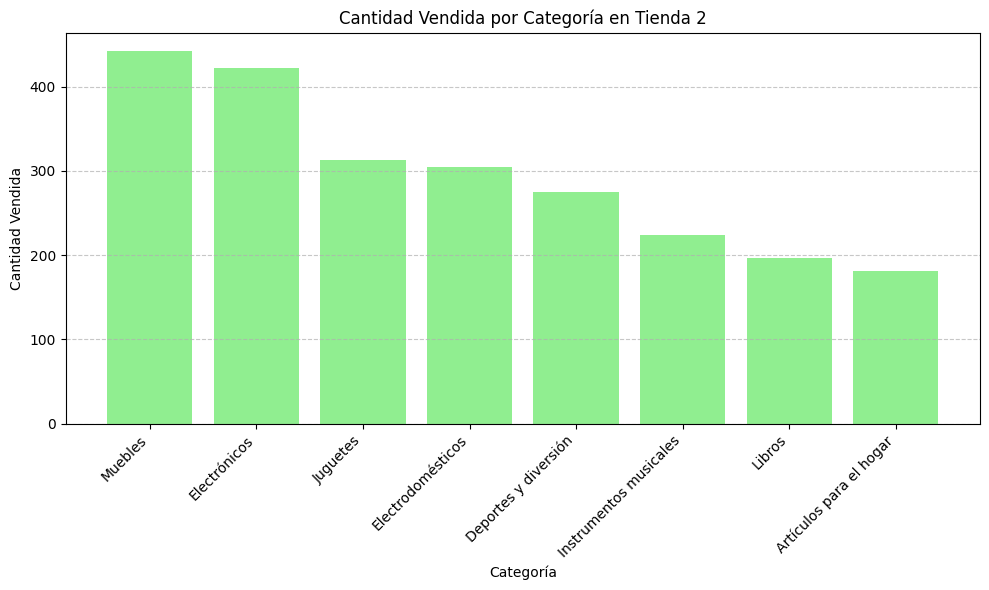


Categorías más populares en Tienda 3:
    Categoría del Producto  Cantidad
0                  Muebles       499
1             Electrónicos       451
2                 Juguetes       315
3        Electrodomésticos       278
4     Deportes y diversión       277
5                   Libros       185
6   Instrumentos musicales       177
7  Artículos para el hogar       177


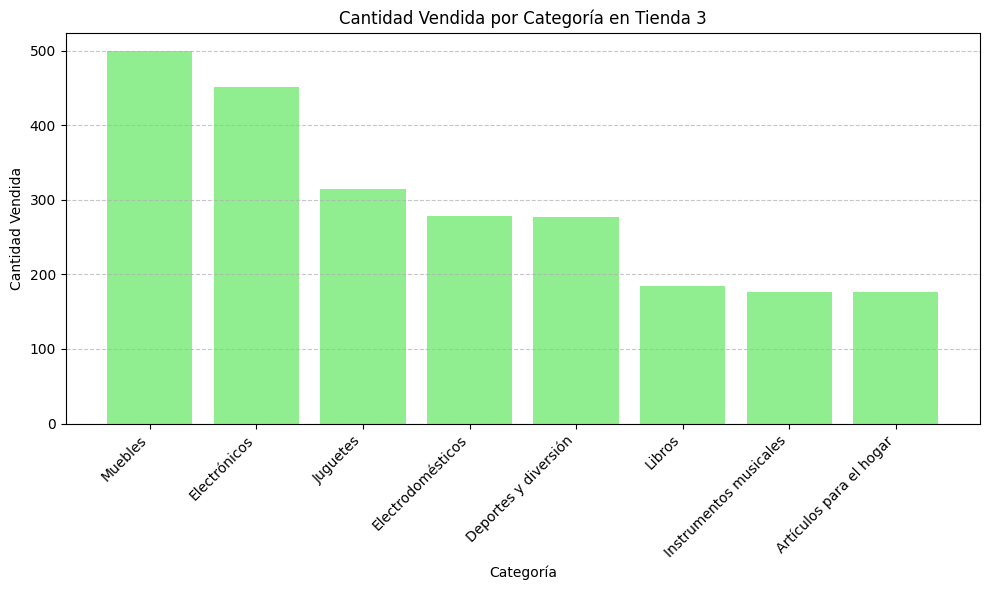


Categorías más populares en Tienda 4:
    Categoría del Producto  Cantidad
0                  Muebles       480
1             Electrónicos       451
2                 Juguetes       338
3     Deportes y diversión       277
4        Electrodomésticos       254
5  Artículos para el hogar       201
6                   Libros       187
7   Instrumentos musicales       170


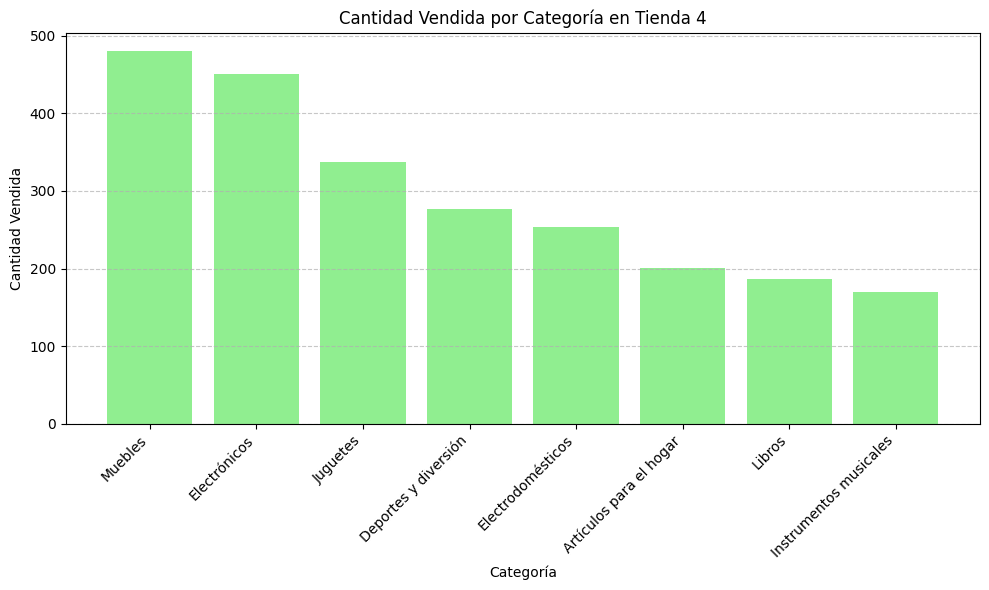

In [24]:
# Función para analizar las categorías más populares por tienda
def analizar_categorias(tienda_df, tienda_nombre):
    # Contamos la frecuencia de cada categoría (cada fila es una venta)
    categorias = tienda_df['Categoría del Producto'].value_counts().reset_index()
    categorias.columns = ['Categoría del Producto', 'Cantidad']

    print(f"\nCategorías más populares en {tienda_nombre}:")
    print(categorias)

    # Graficamos las categorías
    plt.figure(figsize=(10, 6))
    plt.bar(categorias['Categoría del Producto'], categorias['Cantidad'], color='lightgreen')
    plt.title(f'Cantidad Vendida por Categoría en {tienda_nombre}')
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return categorias

# Analizamos las categorías para cada tienda
categorias_tienda = analizar_categorias(tienda, 'Tienda 1')
categorias_tienda2 = analizar_categorias(tienda2, 'Tienda 2')
categorias_tienda3 = analizar_categorias(tienda3, 'Tienda 3')
categorias_tienda4 = analizar_categorias(tienda4, 'Tienda 4')

# 3. Calificación promedio de la tienda


     Tienda  Evaluación Promedio
0  Tienda 1             3.976685
1  Tienda 2             4.037304
2  Tienda 3             4.048326
3  Tienda 4             3.995759


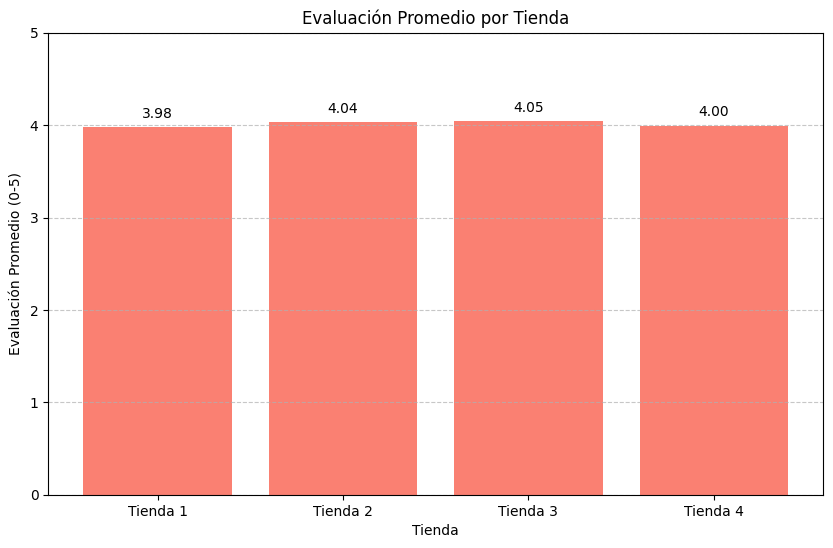


La tienda con menor evaluación promedio es: Tienda 1


In [27]:
# Calculamos la evaluación promedio por tienda
evaluacion_tienda = tienda['Calificación'].mean()
evaluacion_tienda2 = tienda2['Calificación'].mean()
evaluacion_tienda3 = tienda3['Calificación'].mean()
evaluacion_tienda4 = tienda4['Calificación'].mean()

# Creamos un DataFrame para mostrar las evaluaciones
evaluacion_promedio = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Evaluación Promedio': [evaluacion_tienda, evaluacion_tienda2, evaluacion_tienda3, evaluacion_tienda4]
})
print(evaluacion_promedio)

# Graficamos la evaluación promedio
plt.figure(figsize=(10, 6))
plt.bar(evaluacion_promedio['Tienda'], evaluacion_promedio['Evaluación Promedio'], color='salmon')
plt.title('Evaluación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Evaluación Promedio (0-5)')
plt.ylim(0, 5)  # Establecemos el límite del eje y para que sea de 0 a 5
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadimos los valores encima de cada barra
for i, v in enumerate(evaluacion_promedio['Evaluación Promedio']):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center')

plt.show()

# Identificamos la tienda con menor evaluación promedio
tienda_menor_evaluacion = evaluacion_promedio.loc[evaluacion_promedio['Evaluación Promedio'].idxmin(), 'Tienda']
print(f"\nLa tienda con menor evaluación promedio es: {tienda_menor_evaluacion}")


# 4. Productos más y menos vendidos


Productos más vendidos en Tienda 1:
           Producto  Frecuencia
0        Microondas          60
1     TV LED UHD 4K          60
2           Armario          60
3  Secadora de ropa          58
4     Mesa de noche          56

Productos menos vendidos en Tienda 1:
                       Producto  Frecuencia
46  Ciencia de datos con Python          39
47                    Pandereta          36
48              Olla de presión          35
49    Auriculares con micrófono          33
50                 Celular ABXY          33


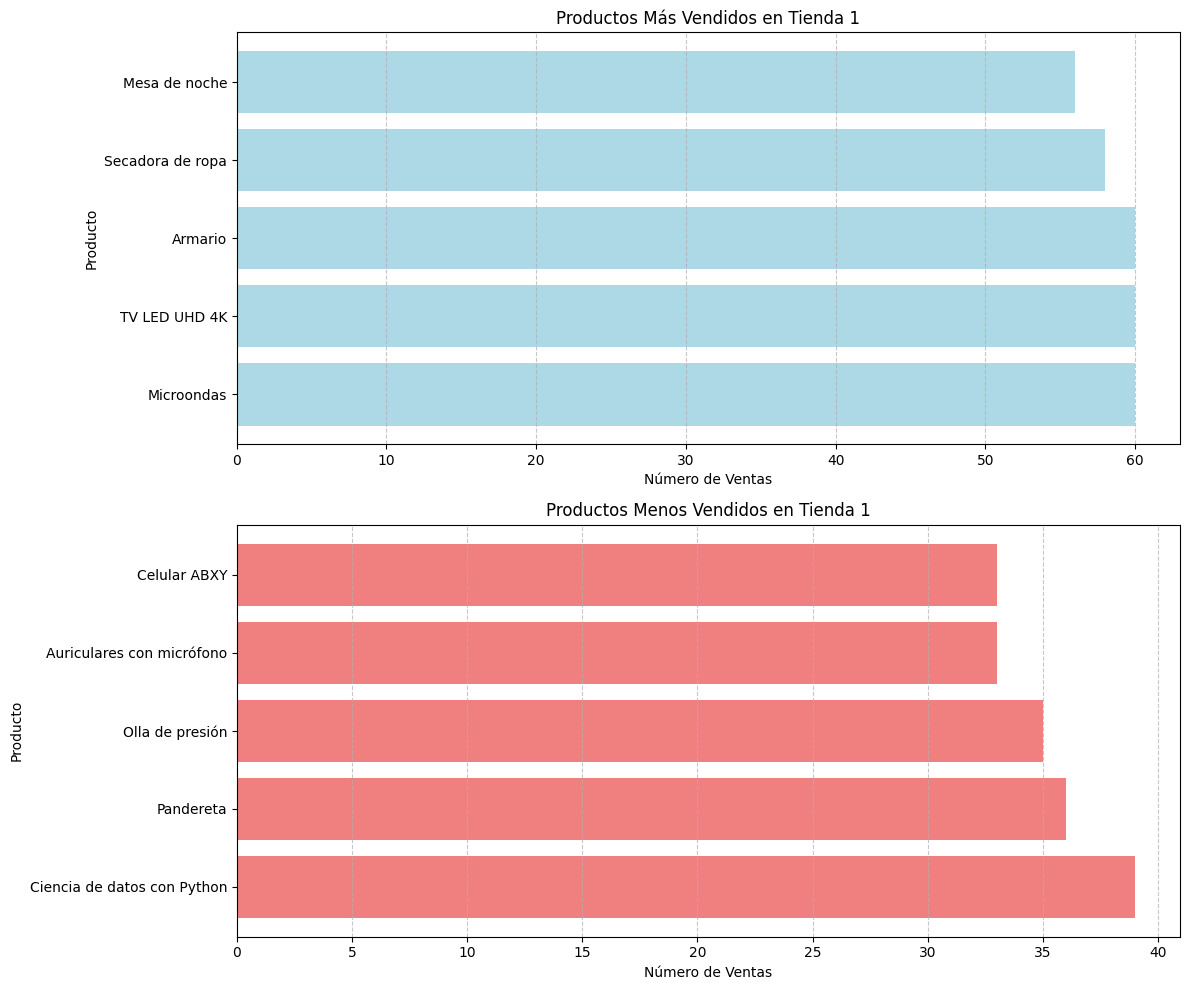


Productos más vendidos en Tienda 2:
                    Producto  Frecuencia
0  Iniciando en programación          65
1                 Microondas          62
2                    Batería          61
3          Guitarra acústica          58
4                  Pandereta          58

Productos menos vendidos en Tienda 2:
           Producto  Frecuencia
46      Auriculares          37
47           Sillón          35
48  Mesa de comedor          34
49        Impresora          34
50    Juego de mesa          32


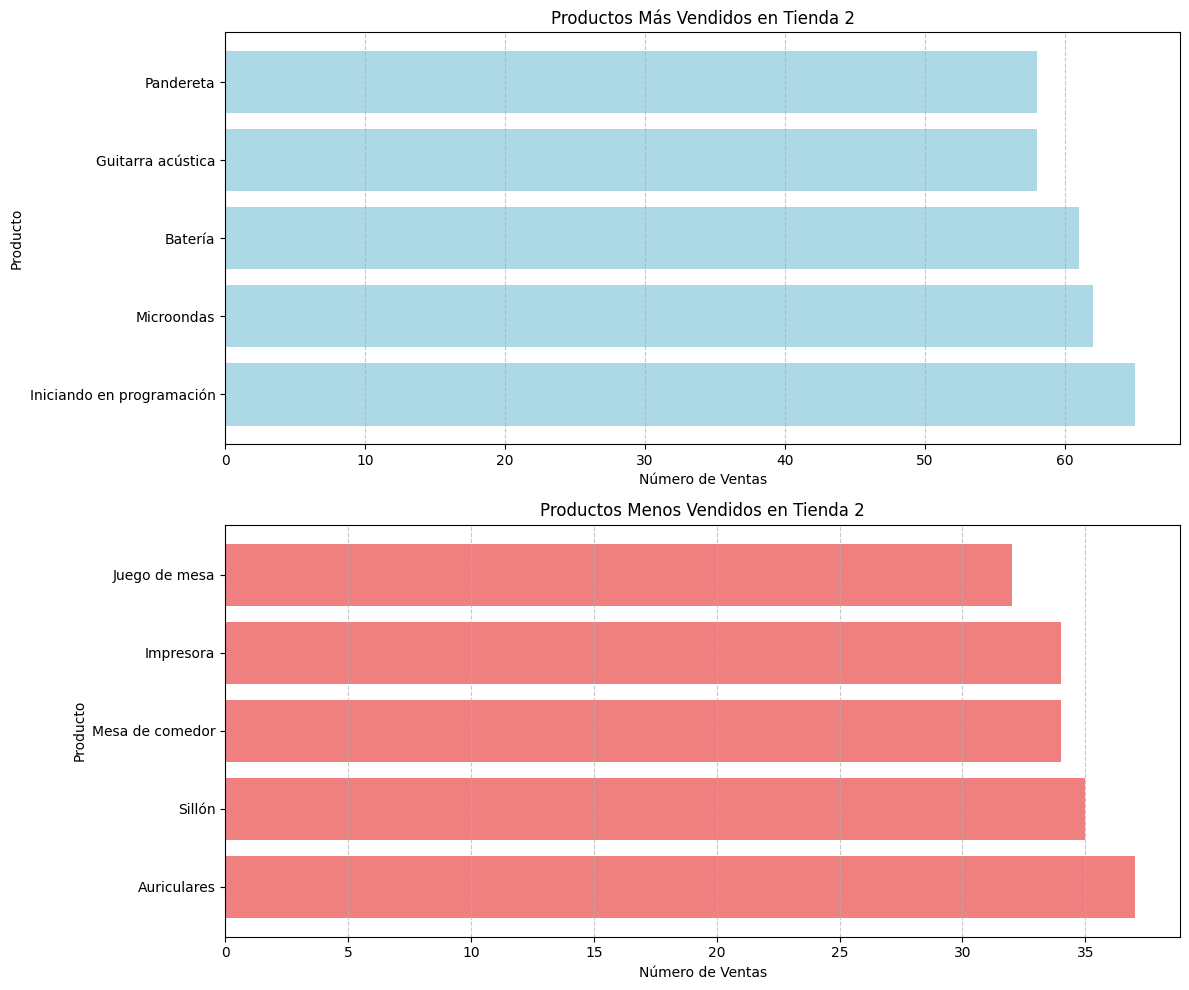


Productos más vendidos en Tienda 3:
          Producto  Frecuencia
0    Kit de bancas          57
1  Mesa de comedor          56
2        Cama king          56
3     Set de ollas          55
4    Mesa de noche          55

Productos menos vendidos en Tienda 3:
                   Producto  Frecuencia
46       Guitarra eléctrica          38
47             Set de vasos          36
48                  Mochila          36
49               Microondas          36
50  Bloques de construcción          35


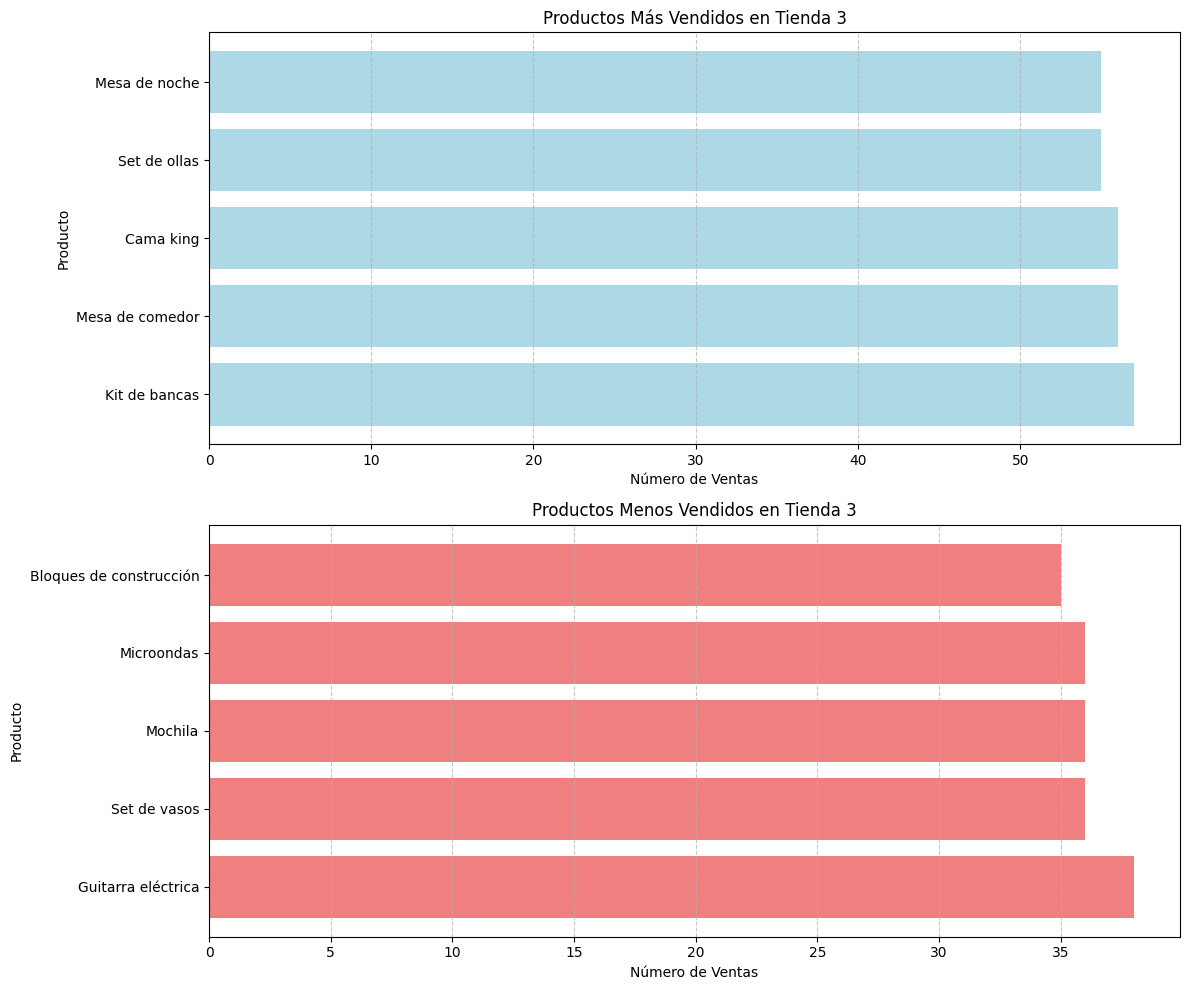


Productos más vendidos en Tienda 4:
                    Producto  Frecuencia
0                   Cama box          62
1                 Cubertería          59
2    Dashboards con Power BI          56
3                  Cama king          56
4  Carrito de control remoto          55

Productos menos vendidos en Tienda 4:
                       Producto  Frecuencia
46                 Refrigerador          38
47  Ciencia de datos con Python          38
48            Guitarra acústica          37
49                      Armario          34
50           Guitarra eléctrica          33


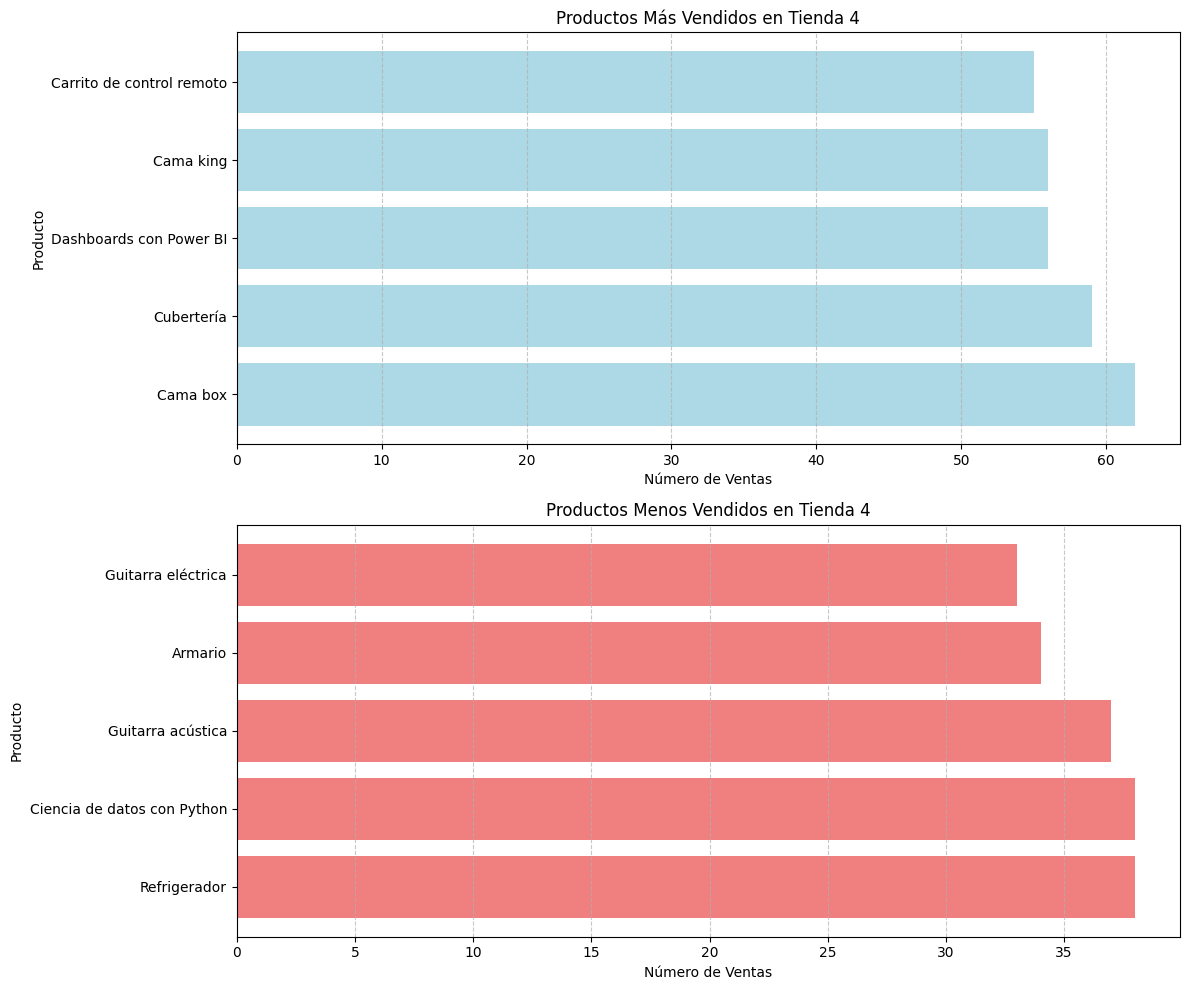

In [29]:
def analizar_productos(tienda_df, tienda_nombre):
    # Contamos la frecuencia de cada producto (cada fila es una venta individual)
    productos = tienda_df['Producto'].value_counts().reset_index()
    productos.columns = ['Producto', 'Frecuencia']

    # Ordenamos para identificar los más y menos vendidos (ya están ordenados por value_counts)
    productos_mas_vendidos = productos.head(5)
    productos_menos_vendidos = productos.tail(5)

    print(f"\nProductos más vendidos en {tienda_nombre}:")
    print(productos_mas_vendidos)

    print(f"\nProductos menos vendidos en {tienda_nombre}:")
    print(productos_menos_vendidos)

    # Graficamos los productos más y menos vendidos
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 1, 1)
    plt.barh(productos_mas_vendidos['Producto'], productos_mas_vendidos['Frecuencia'], color='lightblue')
    plt.title(f'Productos Más Vendidos en {tienda_nombre}')
    plt.xlabel('Número de Ventas')
    plt.ylabel('Producto')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.subplot(2, 1, 2)
    plt.barh(productos_menos_vendidos['Producto'], productos_menos_vendidos['Frecuencia'], color='lightcoral')
    plt.title(f'Productos Menos Vendidos en {tienda_nombre}')
    plt.xlabel('Número de Ventas')
    plt.ylabel('Producto')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    return productos_mas_vendidos, productos_menos_vendidos

# Analizamos los productos para cada tienda
productos_mas_menos_tienda = analizar_productos(tienda, 'Tienda 1')
productos_mas_menos_tienda2 = analizar_productos(tienda2, 'Tienda 2')
productos_mas_menos_tienda3 = analizar_productos(tienda3, 'Tienda 3')
productos_mas_menos_tienda4 = analizar_productos(tienda4, 'Tienda 4')


# 5. Envío promedio por tienda

     Tienda  Costo Promedio de Envío
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


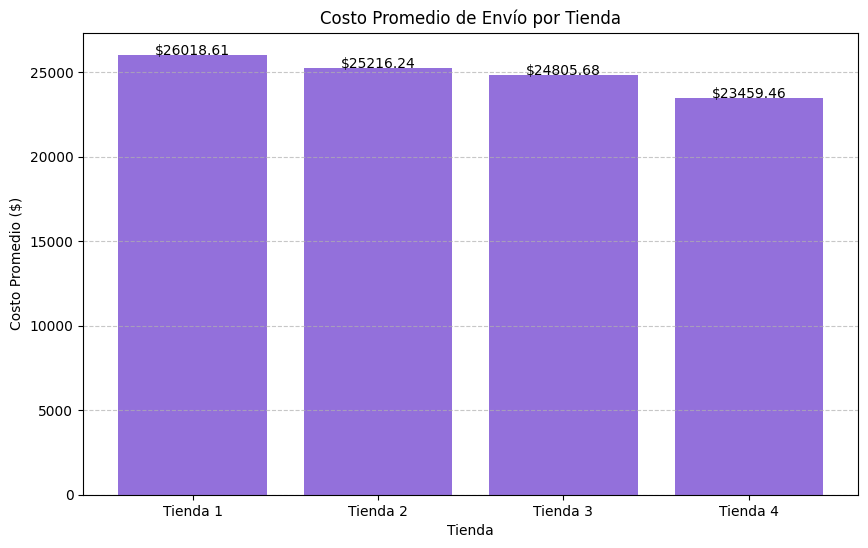


La tienda con mayor costo promedio de envío es: Tienda 1


In [32]:
# Calculamos el costo promedio de envío por tienda
envio_tienda = tienda['Costo de envío'].mean()
envio_tienda2 = tienda2['Costo de envío'].mean()
envio_tienda3 = tienda3['Costo de envío'].mean()
envio_tienda4 = tienda4['Costo de envío'].mean()

# Creamos un DataFrame para mostrar los costos de envío
costo_envio = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo Promedio de Envío': [envio_tienda, envio_tienda2, envio_tienda3, envio_tienda4]
})
print(costo_envio)

# Graficamos el costo promedio de envío
plt.figure(figsize=(10, 6))
plt.bar(costo_envio['Tienda'], costo_envio['Costo Promedio de Envío'], color='mediumpurple')
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadimos los valores encima de cada barra
for i, v in enumerate(costo_envio['Costo Promedio de Envío']):
    plt.text(i, v + 0.5, f'${v:.2f}', ha='center')

plt.show()

# Identificamos la tienda con mayor costo de envío
tienda_mayor_envio = costo_envio.loc[costo_envio['Costo Promedio de Envío'].idxmax(), 'Tienda']
print(f"\nLa tienda con mayor costo promedio de envío es: {tienda_mayor_envio}")

<h1>Conclusión</h1>

     Tienda  Puntos Facturación  Puntos Evaluación  Puntos Envío  \
0  Tienda 1                 4.0                1.0           1.0   
1  Tienda 2                 3.0                3.0           2.0   
2  Tienda 3                 2.0                4.0           3.0   
3  Tienda 4                 1.0                2.0           4.0   

   Puntuación Total  
0               6.0  
1               8.0  
2               9.0  
3               7.0  


<Figure size 1200x600 with 0 Axes>

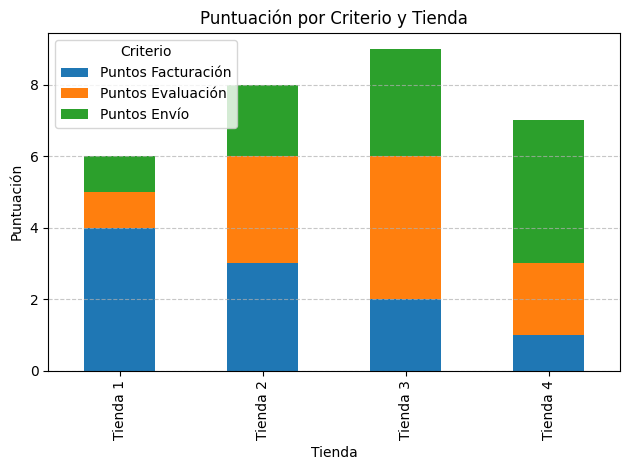


-------- CONCLUSIÓN FINAL --------
Basado en nuestro análisis exhaustivo de los cinco aspectos solicitados, recomendamos al Sr. Juan vender la Tienda 1.

Esta recomendación se basa en que la Tienda 1 obtuvo la puntuación más baja en el conjunto de criterios evaluados:
1. Facturación total
2. Evaluación promedio de clientes
3. Costo promedio de envío

Adicionalmente, hemos analizado las categorías más populares y los productos más y menos vendidos,
lo que proporciona una visión completa del desempeño comercial de cada tienda.

Vender la Tienda 1 permitiría al Sr. Juan enfocarse en las tiendas con mejor desempeño
e invertir en un nuevo negocio con mayor potencial de crecimiento y rentabilidad.


In [33]:
# Creamos un sistema de puntuación para cada tienda (menor = peor desempeño)
# 1. Facturación (menor = peor)
facturacion_total['Puntos Facturación'] = facturacion_total['Facturación Total'].rank()

# 2. Evaluación (menor = peor)
evaluacion_promedio['Puntos Evaluación'] = evaluacion_promedio['Evaluación Promedio'].rank()

# 3. Costo de envío (mayor = peor)
costo_envio['Puntos Envío'] = (5 - costo_envio['Costo Promedio de Envío'].rank())

# Combinamos los puntajes
resumen = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Puntos Facturación': facturacion_total['Puntos Facturación'].values,
    'Puntos Evaluación': evaluacion_promedio['Puntos Evaluación'].values,
    'Puntos Envío': costo_envio['Puntos Envío'].values
})

# Calculamos la puntuación total (menor puntuación = peor desempeño)
resumen['Puntuación Total'] = resumen['Puntos Facturación'] + resumen['Puntos Evaluación'] + resumen['Puntos Envío']
print(resumen)

# Identificamos la tienda con el peor desempeño general
tienda_peor_desempeno = resumen.loc[resumen['Puntuación Total'].idxmin(), 'Tienda']

# Graficamos el resumen de puntuaciones
plt.figure(figsize=(12, 6))
resumen.set_index('Tienda')[['Puntos Facturación', 'Puntos Evaluación', 'Puntos Envío']].plot(kind='bar', stacked=True)
plt.title('Puntuación por Criterio y Tienda')
plt.xlabel('Tienda')
plt.ylabel('Puntuación')
plt.legend(title='Criterio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Conclusión final
print("\n-------- CONCLUSIÓN FINAL --------")
print(f"Basado en nuestro análisis exhaustivo de los cinco aspectos solicitados, recomendamos al Sr. Juan vender la {tienda_peor_desempeno}.")
print(f"\nEsta recomendación se basa en que la {tienda_peor_desempeno} obtuvo la puntuación más baja en el conjunto de criterios evaluados:")
print(f"1. Facturación total")
print(f"2. Evaluación promedio de clientes")
print(f"3. Costo promedio de envío")
print(f"\nAdicionalmente, hemos analizado las categorías más populares y los productos más y menos vendidos,")
print(f"lo que proporciona una visión completa del desempeño comercial de cada tienda.")
print(f"\nVender la {tienda_peor_desempeno} permitiría al Sr. Juan enfocarse en las tiendas con mejor desempeño")
print(f"e invertir en un nuevo negocio con mayor potencial de crecimiento y rentabilidad.")